In [2]:
import matplotlib.pyplot as plt
import numpy as np

# linear regression
------

mean x , mean y 	 3.0 2.8


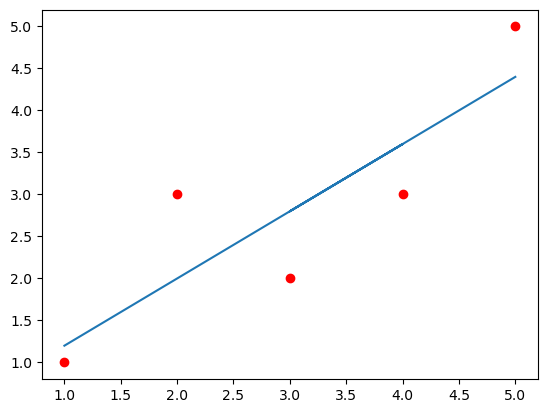

	y haye pishbini shode:[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
	yhaye asli:[1, 3, 3, 2, 5]
error (mean distance from y ):  0.692820323027551


'\n#shortcut for find B1\nb1=np.corrcoef(xx,yy)[1][0]*(np.std(yy)/np.std(xx))\nb1\n'

In [3]:

xx=[1,2,4,3,5]
yy=[1,3,3,2,5]
def meang(data):
    ins_num=len(data)
    ins_sum=sum(data)
    res=ins_sum/ins_num
    return res
meanX=meang(xx)
meanY=meang(yy)
print('mean x , mean y \t',meanX,meanY)
#  y=b0+ b1*x
#  b1=sum((xi-mean) -( yi - mean))/sum ((xi-mean)**2)
def simple_linear_regression(x,y):
    '''
    if y depend on one x
 Standard deviation is a measure of how much on average the data is spread out from the
 mean.
    '''
    meanX=meang(x)
    meanY=meang(y)
    s0=[]
    s1=[]
    for i in range(len(x)):
        sorat=(x[i]-meanX)*(y[i]-meanY)
        makhraj=(x[i]-meanX)**2
        s0.append(sorat)
        s1.append(makhraj)
    b1res=sum(s0)/sum(s1)
    b0res=meanY-(b1res*meanX)
    resy=[]
    for i in range(len(x)):
        a=b0res+(b1res*x[i])
        resy.append(a)
    plt.plot(x,resy)
    plt.scatter(x,y,color='r')

    plt.show()
    return resy
yp=simple_linear_regression(xx,yy)
print('\ty haye pishbini shode:{}\n\tyhaye asli:{}'.format(yp,yy))
def Rmse(yd,yp):
    n=len(yp)
    b=[]
    for i in range(n):
        a=(yp[i]-yd[i])**2
        b.append(a)
    c=sum(b)
    d=np.sqrt(c/n)
    return d
print('error (mean distance from y ): ',Rmse(yy,yp))
'''
#shortcut for find B1
b1=np.corrcoef(xx,yy)[1][0]*(np.std(yy)/np.std(xx))
b1
'''

# Gradient descent 
----------

In [5]:
# y=b0+ b1*x
# for 1st of yy and xx
def GD(initweight,index):
    init_weight=initweight
    yyp=init_weight[0]+init_weight[1]*xx[index]
    err=yyp-yy[index]
    for i in range(300):
        #print(init_weight)
        learning_rate=0.1
        upvalue0=init_weight[0]-(err*learning_rate)
        init_weight[0]=upvalue0
        upvalue1=init_weight[1]-(err*learning_rate*xx[index])   # error naghsh gradian ro dare 
        init_weight[1]=upvalue1                                 # dar asl bayad moshtagh martabe 1 taabe baashe
        yyp=init_weight[0]+init_weight[1]*xx[index]
        err=yyp-yy[index]
        
    return init_weight
wn=GD([0,0],4)
def predictor(x,y,w):
    resy=[]
    for i in range(len(x)):
        yyp=w[0]+w[1]*x[i]
        resy.append(yyp)
    for i,j in zip(y,resy):
        print(i,j)
    return resy
basd=predictor(xx,yy,wn)
Rmse(yy,basd)

1 -1.9867476295830143e+61
3 -3.6423706542355264e+61
3 -6.95361670354055e+61
2 -5.297993678888038e+61
5 -8.609239728193062e+61


5.792314927648244e+61

# Lofistic regression
---------

(10, 2)

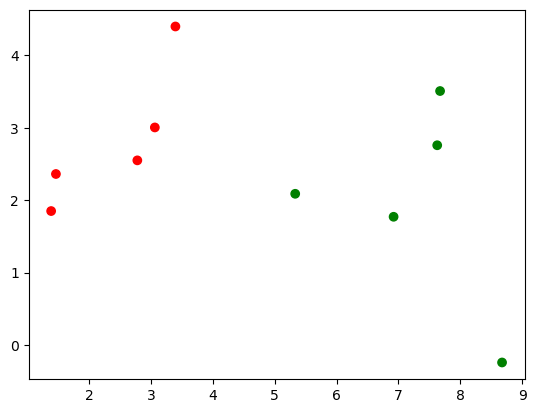

In [7]:
X=np.array([[2.7810836, 2.550537003, 0],
           [1.465489372, 2.362125076, 0],
   [3.396561688, 4.400293529, 0],
   [1.38807019, 1.850220317, 0],
   [3.06407232, 3.005305973, 0],
   [7.627531214, 2.759262235, 1],
    [5.332441248, 2.088626775, 1],
    [6.922596716, 1.77106367, 1],
    [8.675418651, -0.242068655, 1],
    [7.673756466, 3.508563011, 1]
])
x1,x2,y=X[:,0],X[:,1],X[:,2]

a=np.ones(len(x2))
Xd=np.array(list(zip(x1,x2)))

y=[int(x) for x in y]
colormap = np.array(['r', 'g'])
plt.scatter(x1,x2,color=colormap[y])
Xd.shape

In [9]:
import random
class LR:
    def __init__(self):
        pass
    def sigmoid(self,w,x):
        res=w[0]+(np.dot(w[1:],x))
        out=1/(1+np.exp(-res))
        return out
    def updater(self,w,alpha,y,ypred,x):
        w1 = w[0] + alpha * (y-ypred) * ypred * (1-ypred)* 1
        w2 = w[1] + alpha * (y-ypred) * ypred * (1-ypred)* x[0]
        w3 = w[2] + alpha * (y-ypred) * ypred * (1-ypred)* x[1]
        wnew=list([w1,w2,w3])
        return wnew
    def doo(self,inw,x,y,ite):
        t=0
        w=inw
        while t <ite :
            sto=random.randint(0,9)
            a=self.sigmoid(w,x[sto])
            w=self.updater(w,0.3,y[sto],a,x[sto])
            #print(w,sto)
            t+=1
        return w
    def predicter(self,w,x,y):
        sto=[]
        for i in x:
            a=self.sigmoid(w,i)
            sto.append(a)
        res=[]
        for i in sto:
            if i>=0.5:
                i=1
                res.append(i)
            elif i< 0.5:
                i=0
                res.append(i)
        acc=[(i,j) for i,j in zip(y,res)]
        score=0
        for i,j in acc:
            if i == j :
                score+=1
        
        print(acc,'\nthe accuracy : \t',score/len(x))
        return res
sg=LR()
inw=[0,0,0]
yp=sg.sigmoid(inw,Xd[0])
sg.updater([0,0,0],0.3,y[0],yp,Xd[0])
www=sg.doo([0,0,0],Xd,y,20)
#sg.predicter(www,Xd,y)
sg.predicter(www,Xd,y)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] 
the accuracy : 	 1.0


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Linear Discriminant Analysis
---------------
calculate mean and variance for each class

calculate the class probability 


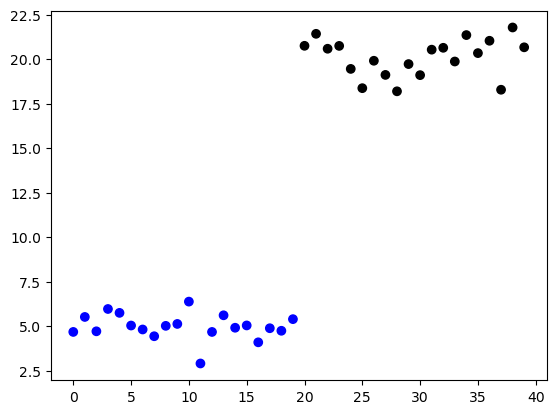

In [11]:
#Load data
data=[
[4.667797637, 0],
[5.509198779, 0],
[4.702791608, 0],
[5.956706641,0],
[5.738622413, 0],
[5.027283325, 0],
[4.805434058, 0],
[4.425689143, 0],
[5.009368635, 0],
[5.116718815, 0],
[6.370917709, 0],
[2.895041947, 0],
[4.666842365, 0],
[5.602154638, 0],
[4.902797978, 0],
[5.032652964, 0],
[4.083972925, 0],
[4.875524106, 0],
[4.732801047, 0],
[5.385993407, 0],
[20.74393514, 1],
[21.41752855, 1],
[20.57924186, 1],
[20.7386947 ,1],
[19.44605384, 1],
[18.36360265, 1],
[19.90363232, 1],
[19.10870851, 1],
[18.18787593, 1],
[19.71767611, 1],
[19.09629027, 1],
[20.52741312, 1],
[20.63205608, 1],
[19.86218119, 1],
[21.34670569, 1],
[20.333906 ,1],
[21.02714855, 1],
[18.27536089, 1],
[21.77371156, 1],
[20.65953546, 1]]
data=np.array(data)
xdata=data[:,0]
ydata=data[:,1]
y=[int(i) for i in ydata]
colormap=np.array(['b','k'])
plt.scatter(range(len(xdata)),xdata,color=colormap[y])
plt.show()
class1=[]
class2=[]
for i in range(len(xdata)):
    if ydata[i] == 0:
        class1.append(xdata[i])
    elif ydata[i] == 1:
        class2.append(xdata[i])
c1,c2=np.array(class1),np.array(class2)
meanC1,meanC2=np.mean(c1),np.mean(c2)

classprobability=[y.count(1)/len(y),y.count(0)/len(y)]

In [13]:
def SquaredDifference(data):
    mean=sum(data)/len(data)
    a=[(i-mean)**2 for i in data]
    a=sum(a)
    return a
def variance(SD,Nclass,Ninstance):
    var=1/(Ninstance-Nclass) * SD
    return var
    
SDC1,SDC2=SquaredDifference(c1),SquaredDifference(c2)
SDT=SDC1+SDC2
var=variance(SDT,2,len(xdata))
# ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
import math
def LdA(x,mean,var,classProbability):
    a = x * (mean/var)  -  ((mean)**2/(var*2)) + math.log(classProbability)
    return a
def predict(x,mean,var,classProbability):
    sto=[]
    for i in xdata:
        a=LdA(i,meanC1,var,classprobability[0])
        b= LdA(i,meanC2,var,classprobability[1])
        sto.append([a,b])
    res=[]
    for i,j in sto:
        a=0 if i>j else 1
        res.append(a)
    return res
yp=predict(i,meanC1,var,classprobability[0])
ss=0
for i in range(len(y)):
    print(y[i],yp[i])
    if y[i]==yp[i]:
        ss+=1
    
print('acc',ss/len(y))

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
acc 1.0


# `NonLinear algorithms`


# CART 
---------

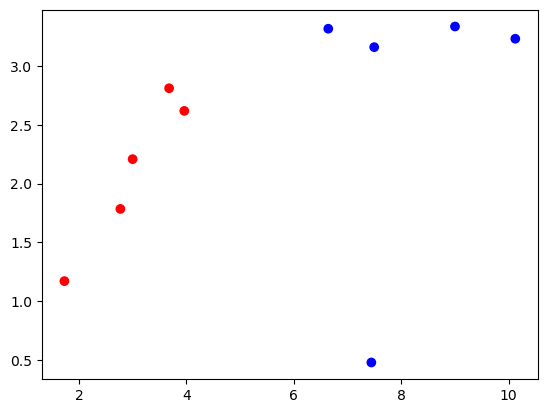

In [15]:
data=[
[2.771244718, 1.784783929, 0],
[1.728571309, 1.169761413 ,0],
[3.678319846, 2.81281357 ,0],
[3.961043357, 2.61995032 ,0],
[2.999208922, 2.209014212, 0],
[7.497545867, 3.162953546, 1],
[9.00220326 ,3.339047188 ,1],
[7.444542326, 0.476683375, 1],
[10.12493903, 3.234550982, 1],
[6.642287351, 3.319983761 ,1]]
data=np.array(data)
xdata=data[:,:2]
ydata=data[:,2]
ydata=[int(i) for i in ydata]
colormap=np.array(['r','b'])
plt.scatter(xdata[:,0],xdata[:,1],color=colormap[ydata])

In [17]:
def spliter(data,sp,y):
    navi={'left':[] , 'right':[]}
    for i in range(len(data)):
        if data[i] >= sp :
            navi['right'].append(y[i])
        elif data[i] < sp:
            navi['left'].append(y[i])
    left_class1=navi['left'].count(1)/len(navi['left'])
    right_class1=navi['right'].count(1)/len(navi['right'])
    left_class2=1-left_class1
    right_class2=1-right_class1
    gini=left_class1 * (1 - left_class1) + right_class1 * (1- right_class1) +left_class2 * (1 - left_class2) + right_class2 * (1- right_class2)
    print(gini)
    return navi

spliter(xdata[:,0],4,ydata)

0.0


{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}